In [27]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib as plt


In [28]:
fbdata = pd.read_csv('./fb5.csv', skipinitialspace=True, low_memory=False)
goog= pd.read_csv('./googl5.csv', skipinitialspace=True, low_memory=False)
aapl= pd.read_csv('./aapl5.csv', skipinitialspace=True, low_memory=False)
amzn= pd.read_csv('./amzn5.csv', skipinitialspace=True, low_memory=False)
tesla= pd.read_csv('./tsla5.csv', skipinitialspace=True, low_memory=False)
nf= pd.read_csv('./nflx5.csv', skipinitialspace=True, low_memory=False)


In [29]:
fbdata['Date'] = pd.to_datetime(fbdata['Date'])  ##tell pandas its a date
fbdata.set_index('Date', inplace=True)

fbdata['Year'] = fbdata.index.year
fbdata['Month'] = fbdata.index.month

goog['Date'] = pd.to_datetime(goog['Date'])  ##tell pandas its a date
goog.set_index('Date', inplace=True)

goog['Year'] = goog.index.year
goog['Month'] = goog.index.month

aapl['Date'] = pd.to_datetime(aapl['Date'])  ##tell pandas its a date
#aapl['Year'] = aapl.index.year
#aapl['Month'] = aapl.index.month
aapl.set_index('Date', inplace=True)

aapl['Year'] = aapl.index.year
aapl['Month'] = aapl.index.month

amzn['Date'] = pd.to_datetime(amzn['Date'])  ##tell pandas its a date
amzn.set_index('Date', inplace=True)
amzn['Year'] = amzn.index.year
amzn['Month'] = amzn.index.month


tesla['Date'] = pd.to_datetime(tesla['Date'])  ##tell pandas its a date
tesla.set_index('Date', inplace=True)
tesla['Year'] = tesla.index.year
tesla['Month'] = tesla.index.month

nf['Date'] = pd.to_datetime(nf['Date'])  ##tell pandas its a date
nf.set_index('Date', inplace=True)
nf['Year'] = nf.index.year
nf['Month'] = nf.index.month

##I'm going to end up with like 20 of these, so I'm going to need to figure out a way to automate these steps

In [31]:
aapl['abspc_change']=(abs((aapl['Open'] - aapl['Close'])/aapl['Open'] ))*100
aapl['change']=(aapl['Open'] - aapl['Close'])
aapl['pc_change']=(aapl['Open'] - aapl['Close'])/aapl['Open']*100

tesla['abspc_change']=(abs((tesla['Open'] - tesla['Close'])/tesla['Open'] ))*100
tesla['change']=(tesla['Open'] - tesla['Close'])
tesla['pc_change']=(tesla['Open'] - tesla['Close'])/tesla['Open']*100

amzn['abspc_change']=(abs((amzn['Open'] - amzn['Close'])/amzn['Open'] ))*100
amzn['change']=(amzn['Open'] - amzn['Close'])
amzn['pc_change']=(amzn['Open'] - amzn['Close'])/amzn['Open']*100

fbdata['abspc_change']=(abs((fbdata['Open'] - fbdata['Close'])/fbdata['Open'] ))*100
fbdata['change']=(fbdata['Open'] - fbdata['Close'])
fbdata['pc_change']=(fbdata['Open'] - fbdata['Close'])/fbdata['Open']*100


In [32]:
####this is the same exact code cut and pasted, why does this one give me an error?

nf['change']=(nf['Open'] - nf['Close'])
nf['pc_change']=(nf['Open'] - nf['Close'])/nf['Open']*100
nf['abspc_change']=(abs((nf['Open'] - nf['Close'])/nf['Open'] ))*100

TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('S32') dtype('S32') dtype('S32')

In [38]:
goog['abspc_change']=(abs((goog['Open'] - goog['Close'])/goog['Open'] ))*100
goog['change']=(goog['Open'] - goog['Close'])
goog['pc_change']=(goog['Open'] - goog['Close'])/goog['Open']*100




In [55]:
tesla.tail(2)


,Open,High,Low,Close,Volume,Year,Month,abspc_change,change,pc_change
Date,,,,,,,,,,
2012-06-29,32.8,32.80,31.00,31.29,1125704,2012,6,4.603659,1.51,4.603659
2012-06-28,31.9,32.11,30.62,31.41,914040,2012,6,1.536050,0.49,1.536050


In [56]:
techs=pd.concat([amzn, goog, aapl, fbdata, tesla])  #leaving out netflix bc it work work.  
techs= techs.groupby(techs.index).mean()



In [57]:
techs.head(2)

,Open,High,Low,Close,Volume,Year,Month,abspc_change,change,pc_change
Date,,,,,,,,,,
2012-06-28,31.900,32.110,30.62,31.41,914040.0,2012.0,6.0,1.536050,0.490,1.536050
2012-06-29,131.952,133.386,130.78,132.90,26430138.4,2012.0,6.0,2.145622,-0.948,0.723411


C:\Users\ewa\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 1257]

In [5]:
### i'm debating different things to look at.  Maybe I want to look at days of high trading volumes and see if i can predict 
the direction or if it happens


SyntaxError: invalid syntax (<ipython-input-5-4a5636c894f7>, line 2)

In [83]:
goog['pc_change'].describe()
aapl['Volume'](1)

TypeError: 'Series' object is not callable

In [99]:
aapl.describe()
aapl['Volume'].describe()
aaplhv=aapl[aapl.Volume > 8.387052e+07]  ##arbitrarily using the 
print aaplhv.head()
ishv=[]
for index, row in aapl.iterrows():
    if row['Volume']>=8.39e+7:
       ishv.append(1)
    else: ishv.append(0)


              Open    High     Low   Close     Volume  Year  Month  \
Date                                                                 
2017-02-01  127.03  130.49  127.01  128.75  111985040  2017      2   
2016-09-15  113.86  115.73  113.49  115.57   90613177  2016      9   
2016-09-14  108.73  113.03  108.60  111.77  112340318  2016      9   
2016-07-27  104.26  104.35  102.75  102.95   92344820  2016      7   
2016-04-27   96.00   98.71   95.68   97.82  113538389  2016      4   

            abspc_change  change  pc_change  
Date                                         
2017-02-01      1.354011   -1.72  -1.354011  
2016-09-15      1.501844   -1.71  -1.501844  
2016-09-14      2.795916   -3.04  -2.795916  
2016-07-27      1.256474    1.31   1.256474  
2016-04-27      1.895833   -1.82  -1.895833  


,Open,High,Low,Close,Volume,Year,Month,abspc_change,change,pc_change
Date,,,,,,,,,,
2017-06-28,144.49,146.11,143.16,145.83,21982505,2017,6,0.927400,-1.34,-0.927400
2017-06-27,145.01,146.16,143.62,143.73,24761891,2017,6,0.882698,1.28,0.882698
2017-06-26,147.17,148.28,145.38,145.82,25692361,2017,6,0.917307,1.35,0.917307
2017-06-23,145.13,147.16,145.11,146.28,35439389,2017,6,0.792393,-1.15,-0.792393
2017-06-22,145.77,146.70,145.12,145.63,19106294,2017,6,0.096042,0.14,0.096042


In [101]:
aapl['ishv']=ishv
aapl.head(2)

,Open,High,Low,Close,Volume,Year,Month,abspc_change,change,pc_change,ishv
Date,,,,,,,,,,,
2017-06-28,144.49,146.11,143.16,145.83,21982505,2017,6,0.927400,-1.34,-0.927400,0
2017-06-27,145.01,146.16,143.62,143.73,24761891,2017,6,0.882698,1.28,0.882698,0


In [119]:
yhv=[]
for index, row in aapl.iterrows():
    if row['ishv'].index[row-1]==1:
       yhv.append(1)
    else: yhv.append(0)

AttributeError: 'numpy.float64' object has no attribute 'index'

In [143]:
aapl[['Close']].resample('M').apply(['median', 'mean']).head()

Close           
           median       mean
Date                        
2012-06-30  83.43  83.430000
2012-07-31  86.35  85.867143
2012-08-31  90.91  91.814348
2012-09-30  97.21  97.366316
2012-10-31  90.68  90.673810

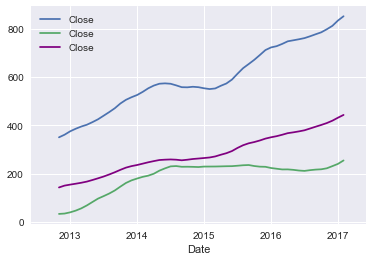

In [152]:
ax=goog[['Close']].resample('M').mean().rolling(window=10, center=True).mean().plot()
ax=tesla[['Close']].resample('M').mean().rolling(window=10, center=True).mean().plot(ax=ax)
ax=techs[['Close']].resample('M').mean().rolling(window=10, center=True).mean().plot(ax=ax, color='purple')


In [170]:
####Looking at the day before

a=goog['Volume'].diff(periods=1) ###can i easily append this onto data?
b=goog['pc_change'].diff(periods=1)
a[0]=0
b[0]=0 # imputing no change for day 1
stats.pearsonr(goog['pc_change'], b)


(0.70563632098345452, 5.4599772920341733e-190)

In [172]:
stats.pearsonr(goog['Volume'], a)

(0.45736573557105653, 5.413972960432339e-66)

In [102]:

#data['Year'].head
import seaborn as sb
%matplotlib inline

In [179]:
c=amzn['Volume'].diff(periods=1) ###can i easily append this onto data?
d=amzn['pc_change'].diff(periods=1)
e=tesla['Close'].diff(periods=1)
f=
c[0]=0
d[0]=0
e[0]=0
f[0]=0

In [176]:
stats.pearsonr(amzn['pc_change'], d)

(0.69755694928394263, 6.7179220096429385e-184)

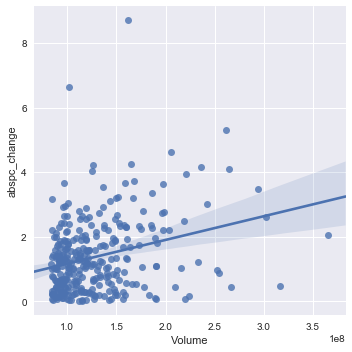

In [60]:
sb.lmplot(x="Volume", y="abspc_change", data=aaplhv)

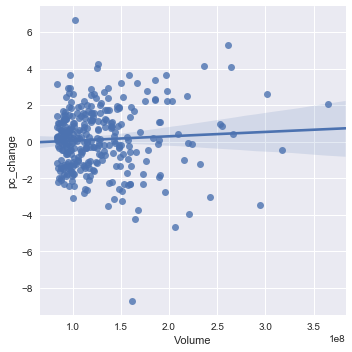

In [12]:
sb.lmplot(x="Volume", y="pc_change", data=aaplhv)

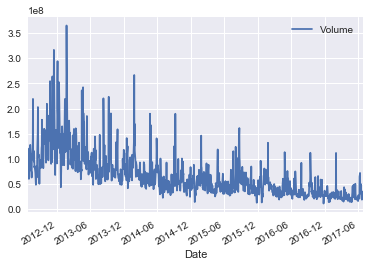

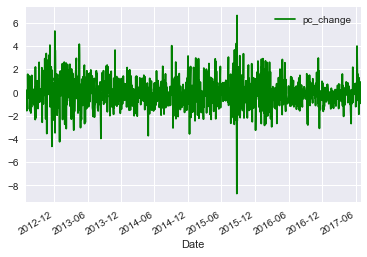

In [61]:
ax=aapl[['Volume']].plot()
aapl[['pc_change']].plot( color='green')



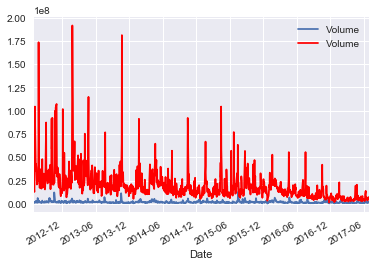

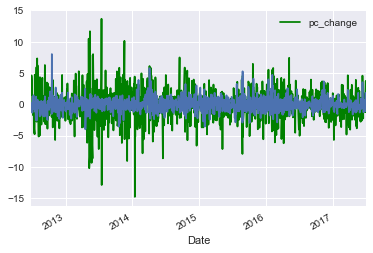

In [62]:
ax=goog[['Volume']].plot()  ###defense company 1
nf[['Volume']].plot(ax=ax, color="red")  ###defense company 2
ax2=tesla[['pc_change']].plot( color='green')
#ng[['Volume']].plot(ax=ax)  ###defense company 2
goog['pc_change'].plot()



In [67]:
from scipy import stats
#stats.pearsonr(ng['Volume'], lll['Volume']) #.24, 2.59e-18
               
stats.pearsonr(goog['pc_change'], aapl['pc_change'])



(0.40043681737486442, 1.3182588318624735e-49)

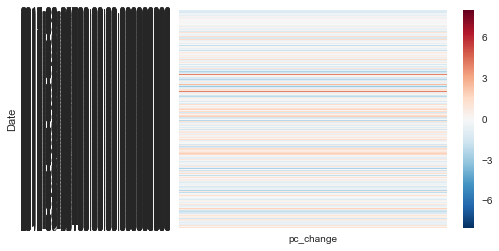

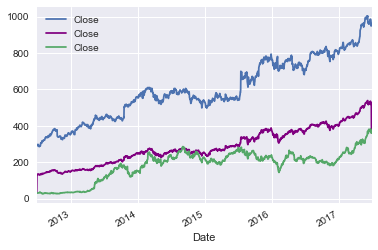

In [133]:
#fbdata[['Close']].plot()
#ax=fbdata[['pc_change']].plot()
ax=goog[['Close']].plot()
techs[['Close']].plot(ax=ax, color='purple')
tesla[['Close']].plot(ax=ax)


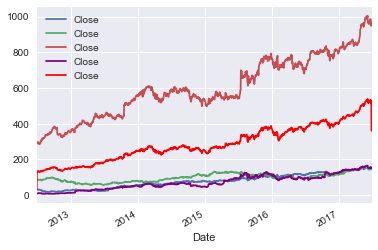

In [137]:
ax=fbdata[['Close']].plot()
aapl[['Close']].plot(ax=ax)
#goog[['Close']].plot(ax=ax)
goog[['Close']].plot(ax=ax)
#tesla[['Close']].plot(ax=ax, color='red')
nf[['Close']].plot(ax=ax, color='purple')
techs[['Close']].plot(ax=ax, color='red')
###i should normalize this-- google is dominating

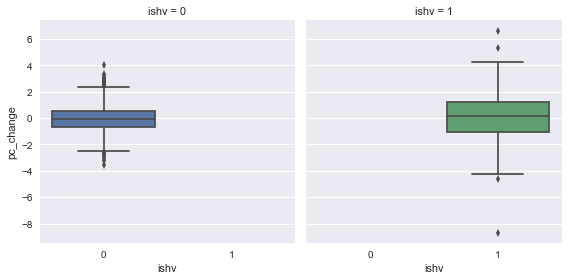

In [140]:
sb.factorplot(
    col='ishv',
    x='ishv',
    y='pc_change',
    data=aapl,
    kind='box',
    
)

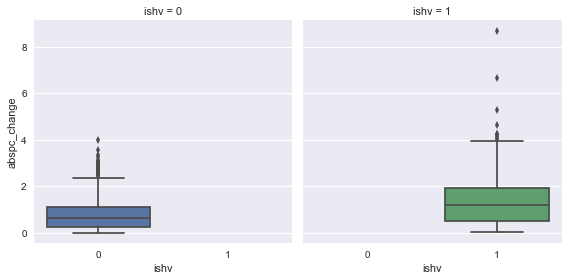

In [141]:
sb.factorplot(
    col='ishv',
    x='ishv',
    y='abspc_change',
    data=aapl,
    kind='box',
    
)

In [ ]:
from TwitterAPI import TwitterAPI
access_token_key = "4879594762-f1l7flCgkbCqHDRrMy2S24wiTfU4fPvtyGy4JTp"
access_token_secret = "6GjVgHKGijy1Nf0pbkuAos60BxVBPmouhpoZM146SGmBj"

api_key = "yjEfKLHbzjcSTPPjklfVodAeI"
api_secret = "Z0z4M5PNC4hwXB82CI7JuVRttsgPiOckXxdXLH9LnUeICylrMR"

_debug = 0


api = TwitterAPI(api_key, api_secret, access_token_key, access_token_secret)

'''
Construct, sign, and open a twitter request
using the hard-coded credentials above.
'''

def retrieve_tweets(Apple, 
                    url="https://stream.twitter.com/1/statuses/filter.json", 
                    method="GET", ):
    """

    Params:
    topic - must be in this format "#topic" or '@handle"
    Returns
    """
    response = api.request('statuses/filter', {'track': topic})
    if response.status_code != 200:
        raise ValueError("Unable to retrieve tweets, please check your API credentials")
    for x in response:
        try:
            yield x
        except UnicodeError as unicode_error:
            continue            
            
            
            

In [ ]:
r = api.request('statuses/update', {'status':'This is a testing!'})
print (r.status_code) 

print (r.text)



In [ ]:
r = api.request('search/tweets', {'q': "Trump"})

for item in r:
    print(item['text'] if 'text' in item else item)

print('\nQUOTA: %s' % r.get_rest_quota())

In [ ]:
import twitter
dir(twitter)
#tweets=twitter.retrieve_tweets("Apple", url="https://stream.twitter.com/1/statuses/filter.json" )
results = api.GetSearch(
    raw_query="q=twitter%20&result_type=recent&since=2014-07-19&count=100")



In [ ]:
from __future__ import print_function
import sys

import twitter

if __name__ == '__main__':
    results = twitter.retrieve_tweets(topic=sys.args[1])
    out = open('../dataset/captured-tweets.txt', 'ab')
    # The tweet is stored with key 'text',
    i = 0
    for result in results:
        # Filter to english tweets
        if result['lang'] == 'en':
            out.write((result['text'] + "\n").encode('utf-8'))
            i += 1
        # Defaulting to capturing 5000, this takes a long time...
        if i == 5000:
            exit()

In [ ]:
#3. Run `python capture-tweets.py <topic>` to save tweets to file called `captured-tweets.txt` related to 
#`<topic>`. I.e.: `python capture-tweets.py Google` or `python capture-tweets.py Iran`

capture-tweets.py(Apple)

